In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter


In [2]:

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


In [3]:
digits = load_digits()
X = digits.data
y = digits.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
k_values = [1, 3, 5, 7, 10]
for k in k_values:
    
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with k={k}: {accuracy:.2f}")

Accuracy with k=1: 0.98
Accuracy with k=3: 0.99
Accuracy with k=5: 0.99
Accuracy with k=7: 0.99
Accuracy with k=10: 0.98


In [ ]:
def plot_digits(images, labels, predictions, num=10):
    plt.figure(figsize=(10, 5))
    for i in range(num):
        plt.subplot(2, num, i + 1)
        plt.imshow(images[i].reshape(8, 8), cmap='gray')
        plt.title(f'True: {labels[i]}')
        plt.axis('off')
        plt.subplot(2, num, num + i + 1)
        plt.imshow(images[i].reshape(8, 8), cmap='gray')
        plt.title(f'Pred: {predictions[i]}')
        plt.axis('off')
    plt.show()

Accuracy with k=1: 0.98
Accuracy with k=3: 0.99
Accuracy with k=5: 0.99
Accuracy with k=7: 0.99
Accuracy with k=10: 0.98


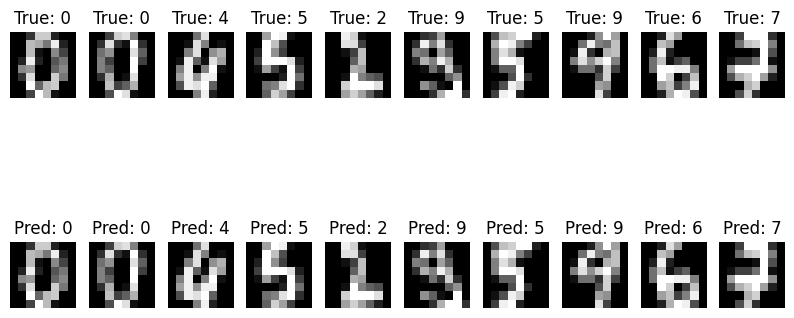

In [ ]:
sample_indices = np.random.choice(len(X_test), size=10, replace=False)
X_sample = X_test[sample_indices]
y_true = y_test[sample_indices]
y_pred = knn.predict(X_sample)

plot_digits(X_sample, y_true, y_pred)
